# Project - Explore Weather Trends
    -by Piyush Kumar

## Extraction of Data

>#### In this I’ve have used two SQL queries to extract data from database
        ● Write a SQL query to extract the global data. Export to CSV.
            ○ SELECT * FROM global_data;
        ● Write a SQL query to extract the city level data. Export to CSV.
            ○ SELECT * FROM city_data where city=’New Delhi’;

### Importing Libraries 

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading and loading datasets

In [249]:
df_local = pd.read_csv('./data/city_data.csv')
df_global = pd.read_csv('./data/global_data.csv')

In [250]:
df_local.head()

,year,city,country,avg_temp
0,1796,New Delhi,India,25.03
1,1797,New Delhi,India,26.71
2,1798,New Delhi,India,24.29
3,1799,New Delhi,India,25.28
4,1800,New Delhi,India,25.21


In [251]:
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


## Data Wrangling

### Checing datasets for Null Values

In [252]:
try:
    #checking null values in global data
    print(df_global.isnull().sum())
except:
    print("error")

year        0
avg_temp    0
dtype: int64


In [253]:
try:
    #checking null values in local data
    print(df_local.isnull().sum())
except:
    print("error")

year         0
city         0
country      0
avg_temp    17
dtype: int64


>### Observations:
        1. Global Data
            a. There are no missing values in the global data
        2. Local Data
            a. There are 17 missing values in the avg_temp column

### Checking for duplicate data

In [254]:
try:
    #for global_data
    print(df_global.duplicated().sum())
except:
    print("error")

0


In [255]:
try:
    #for local_data
    print(df_local.duplicated().sum())
except:
    print("error")

0


>### Observations:
        1. There are no duplicate entries in the global_data and local_data

### Droping Null Valus

In [256]:
df_local.dropna(axis=0, inplace=True)

In [257]:
df_local.isnull().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

>### Observations:
         1. All Null values are removed from the Local_data dataset

## Visualizations

In [258]:
try:
    #seprating avg_temp and year from the global_data
    x_global = df_global['year']
    y_global = df_global['avg_temp']
    
    #seprating avg_temp and year from the local_data
    x_local = df_local['year']
    y_local = df_local['avg_temp']
except:
    print("error")

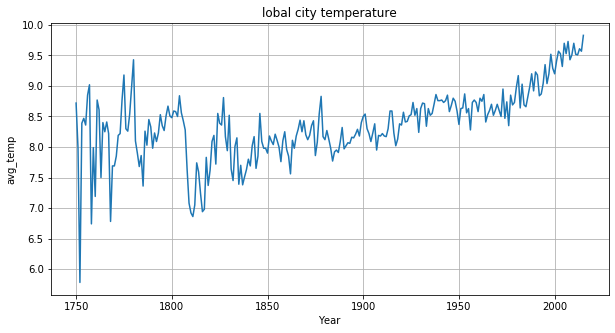

In [259]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('lobal city temperature')
plt.xlabel('Year')
plt.ylabel('avg_temp')
plt.grid(True)
plt.plot(x_global,y_global)

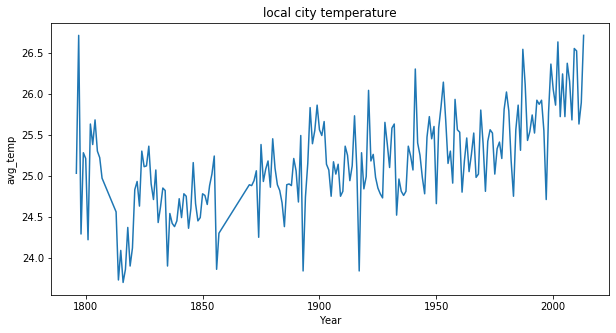

In [260]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('local city temperature')
plt.xlabel('Year')
plt.ylabel('avg_temp')
plt.plot(x_local,y_local)

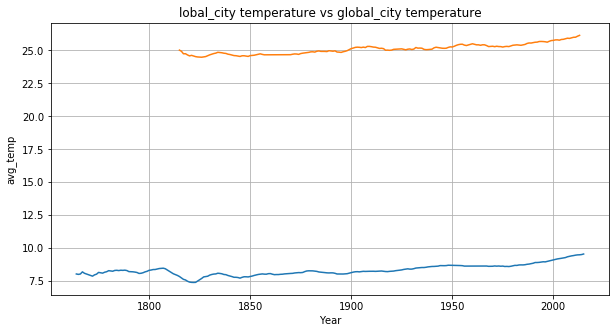

In [261]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('lobal_city temperature vs global_city temperature')
plt.xlabel('Year')
plt.ylabel('avg_temp')
plt.grid(True)
plt.plot(x_global,y_global_mov_avg, label='Global Moving Avg Temperature')
plt.plot(x_local,y_local_mov_avg)

The global average temperature in the period from 1750 and 2015 was: 8.3695 °C.


The average temperature in New Delhi in the period from 1796 and 2013 was: 25.1663 °C.


The temperature difference is -16.7968 °C.


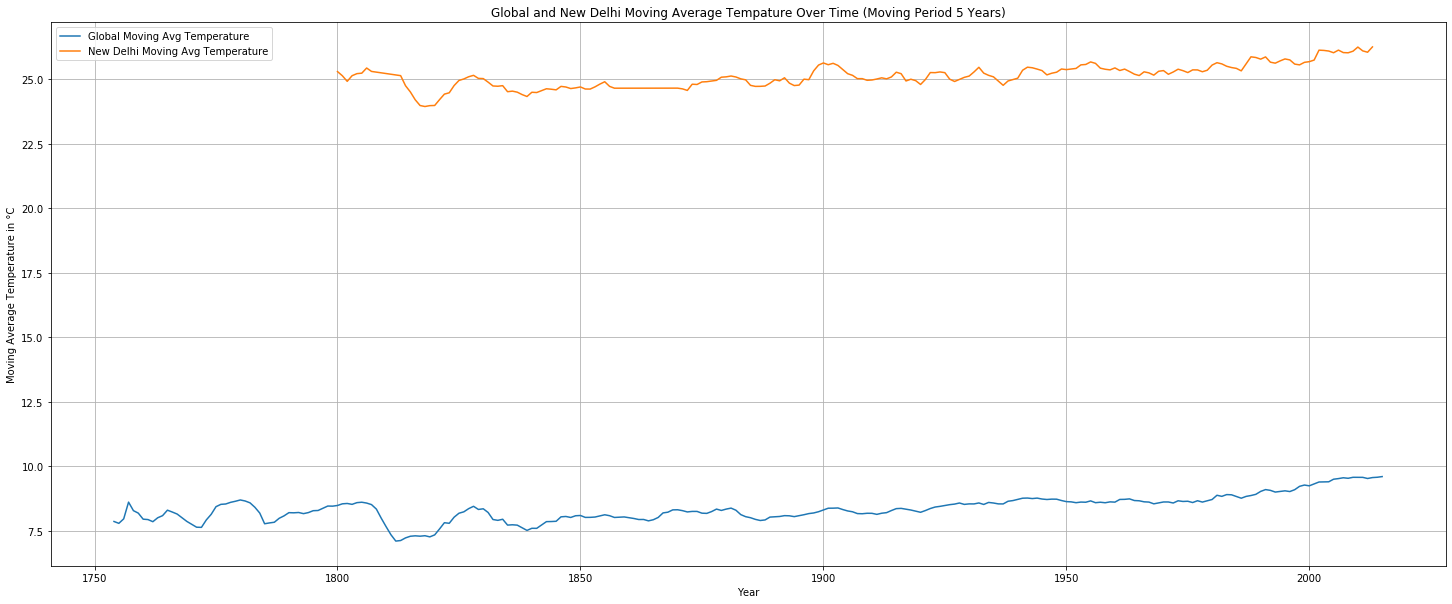

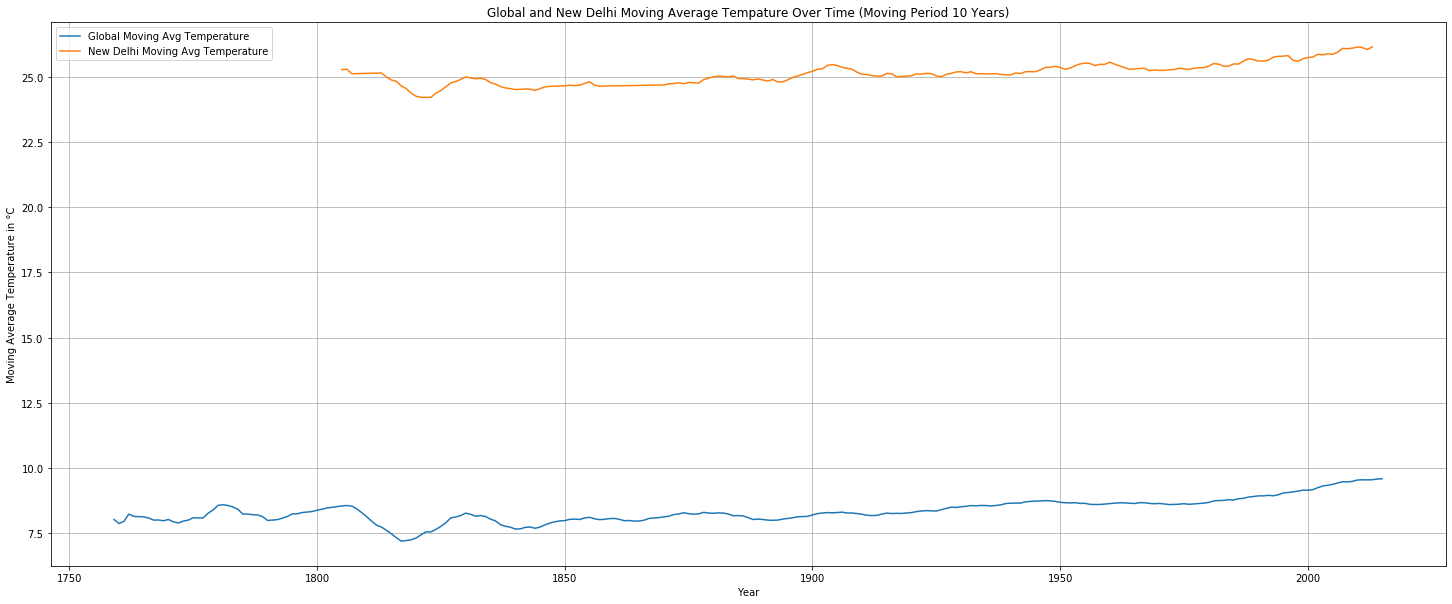

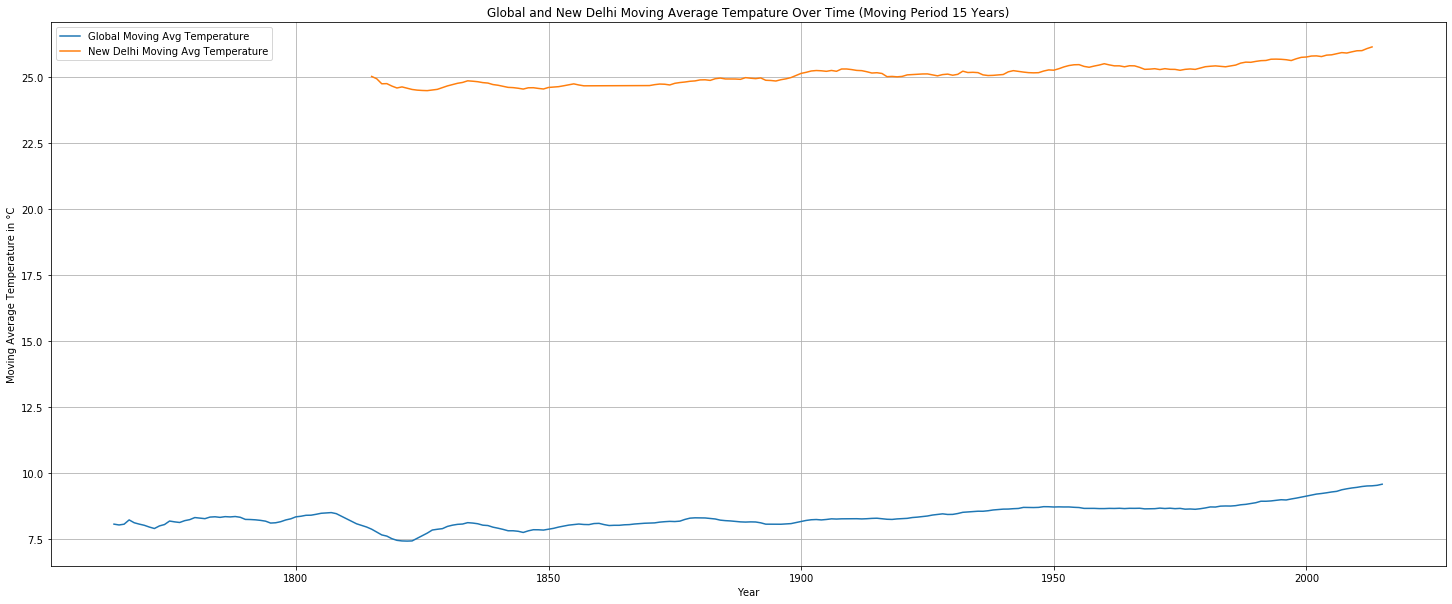

In [262]:
# defining a funtion to check out the difference between the moving line graphs

def window_plot(value):
    str_local="New Delhi"
    # Styling the graphs
    fig = plt.figure(figsize=(25,10)) 

    # Calculating the moving averages globally und locally
    y_global_mov_avg = pd.DataFrame(y_global.rolling(value).mean())
    y_local_mov_avg = pd.DataFrame(y_local.rolling(value).mean())

    plt.plot(x_global,y_global_mov_avg, label='Global Moving Avg Temperature')
    plt.plot(x_local,y_local_mov_avg, label= str_local + ' Moving Avg Temperature')
    plt.title('Global and ' + str_local + ' Moving Average Tempature Over Time (Moving Period ' + str(value) + ' Years)')
    plt.xlabel('Year')
    plt.ylabel('Moving Average Temperature in °C')
    plt.grid(True)
    plt.legend(loc = 2)
window_plot(5)
window_plot(10)
window_plot(15)
print('The global average temperature in the period from ' + str(min_year_global) + ' and ' + str(max_year_global) + ' was: ' 
      + str(round(avg_value_y_global,4)) + ' °C.')
print('\n')
print('The average temperature in ' + str_local + ' in the period from ' + str(min_year_local) + ' and ' + 
      str(max_year_local) + ' was: ' + str(round(avg_value_y_local,4)) + ' °C.')
print('\n')
print('The temperature difference is ' + str(round(avg_value_y_global-avg_value_y_local,4)) + ' °C.')

## Observations:
    1. There were many missing values in New_Delhi_local_dataset. Due to which graph of local_temp appears to be constant for a period of time.
    2. The variation is quite big. Local_temp data has a higher temperature than the global_temp data. Therefore local data has more temperature 
       value than the global data.
    3. Around 1996 or 1997 there was a sudden change in temperature that global average temperature was low but in comparison to local data 
       temperature was high.
    4. New Delhi is a hotter place in comparison to other places.
    5. During the period of 2001-2015, in global dataset variation appears to be small and approximately making a straight line 
       and average temperature ranges around 8-9ºC. Whereas in the local dataset variation is quite high and average temperature ranges around 25ºC
    6. The temperature difference is -16.7968 °C.
    7. The global average temperature in the period from 1750 and 2015 was: 8.3695 °C.
    8. The average temperature in New Delhi in the period from 1796 and 2013 was: 25.1663 °C.

In [263]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Explore_Weather Trends_project_report.ipynb'])

255